In [30]:
##########################################################################

# I acknowledge the use of ChatGPT and AI Tools in Helping me Code and Debug the work in this File

##########################################################################

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# path = "/scratch/network/mm4846/transcripts_2006_2025_03_18_final_master_v2.csv"
path = "/scratch/network/mm4846/transcripts_2006_2025_03_31_distinct_qa_vectors.csv"

df = pd.read_csv(path)

# file_path = "/scratch/network/mm4846/transcripts_2006_2025_04_02_DLTR.csv"
# df_dltr = pd.read_csv(file_path)

import warnings
warnings.filterwarnings('ignore')

In [5]:
# df_new = pd.concat([df, df_dltr], ignore_index=True)
# nan_count = df2['questions_distinct_vector'].isna().sum()
df['word_count'] = df['content'].apply(lambda x: len(x.split()))

df

,Unnamed: 0.11,Unnamed: 0.10,Unnamed: 0.9,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,...,cybersecurity_data_protection_presentation_distinct_mentions,currency_fluctuations_hedging_presentation_distinct_mentions,regulation_presentation_distinct_mentions,liquidity_cash_flow_presentation_distinct_mentions,tax_strategy_presentation_distinct_mentions,ai_presentation_distinct_mentions,interest_rates_presentation_distinct_mentions,labor_presentation_distinct_mentions,m_and_a_mentions_qna_question_count,word_count
0,0,0,0,1283,1283,1283,1283,1283,6337,6337,...,0,0,2,0,0,0,2,0,0,7066
1,1,1,1,1284,1284,1284,1284,1284,6337,6337,...,0,0,2,0,0,0,2,0,0,7066
2,2,2,2,1855,1855,1855,1855,1855,7167,7167,...,0,0,0,3,1,0,1,7,0,11203
3,3,3,3,1856,1856,1856,1856,1856,7167,7167,...,0,0,0,3,1,0,1,7,0,11203
4,4,4,4,2008,2008,2008,2008,2008,7392,7392,...,0,0,0,1,1,0,1,1,0,6509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31867,31867,31867,31867,36191,36191,33711,32471,31851,31467,31468,...,0,0,2,0,0,0,0,0,0,8255
31868,31868,31868,31868,36192,36192,33712,32472,31852,31468,31469,...,0,0,1,2,0,5,5,0,0,12305
31869,31869,31869,31869,36193,36193,33713,32473,31853,31469,31470,...,0,0,1,2,1,0,1,6,0,13421
31870,31870,31870,31870,36194,36194,33714,32474,31854,31470,31471,...,0,0,1,0,1,0,0,0,0,8026


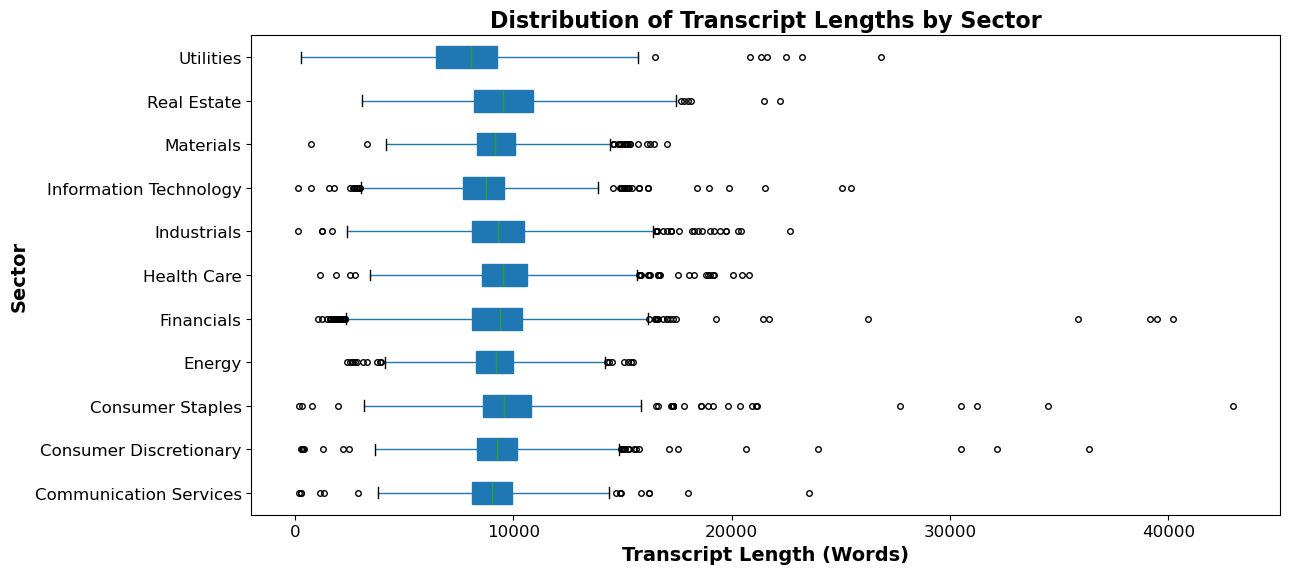

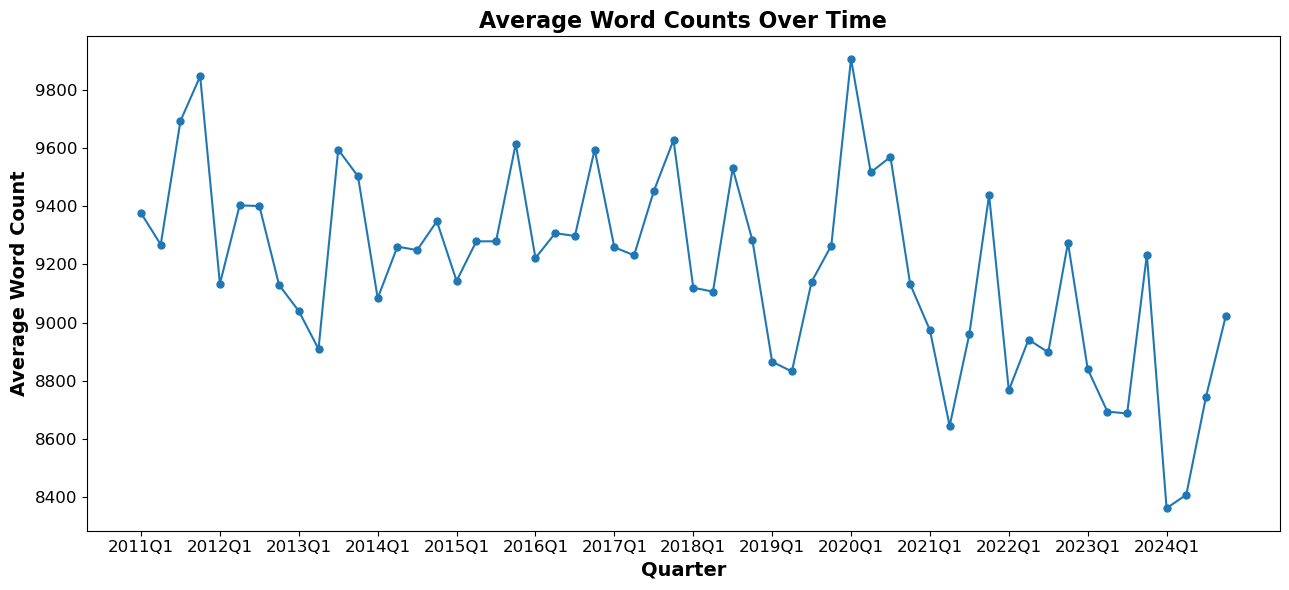

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_word_count_distributions(df):
    # Calculate word counts
    fig, ax = plt.subplots(figsize=(13, 6))  # <- this is the correct way

    # Create boxplot on ax
    bp = df.boxplot(
        column='word_count',
        by='sector_name_mapped',
        vert=False,
        patch_artist=True,    # shaded boxes
        showfliers=True,      # still show some outliers
        flierprops=dict(marker='o', markersize=4),
        whis=2.5,
        ax=ax                 # <- key: plot into the manually created ax
    )

    # Color the boxes
    colors = ['lightblue'] * len(df['sector_name_mapped'].unique())
    for patch, color in zip(bp.artists, colors):
        patch.set_facecolor(color)

    # Titles and labels
    ax.set_title('Distribution of Transcript Lengths by Sector', fontweight='bold', fontsize=16)
    fig.suptitle('')  # remove the automatic suptitle
    ax.set_xlabel('Transcript Length (Words)', fontweight='bold', fontsize=14)
    ax.set_ylabel('Sector', fontweight='bold', fontsize=14)

    # No grid
    ax.grid(False)

    # Keep the axis spines (no remove spines)

    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    plt.tight_layout()
    plt.show()

    df_avg = df.groupby('assigned_quarter')['word_count'].mean().reset_index()
    df_avg = df_avg[df_avg['assigned_quarter'] >= '2011Q1']

    # Sort by assigned_quarter
    df_avg = df_avg.sort_values('assigned_quarter')

    fig, ax = plt.subplots(figsize=(13, 6))

    # Plot average word count
    ax.plot(df_avg['assigned_quarter'], df_avg['word_count'], marker='o', linestyle='-', markersize=5)

    ax.set_title('Average Word Counts Over Time', fontweight='bold', fontsize=16)
    ax.set_xlabel('Quarter', fontweight='bold', fontsize=14)
    ax.set_ylabel('Average Word Count', fontweight='bold', fontsize=14)
    ax.grid(False)

    # Only put xtick labels for Q4s
    xticks = [x for x in df_avg['assigned_quarter'] if x.endswith('Q1')]
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks, fontsize=12)

    ax.tick_params(axis='y', labelsize=12)

    plt.tight_layout()
    plt.show()


plot_word_count_distributions(df)


In [155]:
df_new['vector_length'] = df_new['questions_distinct_vector'].apply(lambda x: len(x) if isinstance(x, list) else np.nan)

print(df_new['vector_length'].value_counts(dropna=False))

vector_length
31    31873
Name: count, dtype: int64


In [154]:
df2['questions_distinct_vector'][31871][7]

0.0

In [7]:
# df['questions_distinct_vector']

In [6]:
# df['other_mentions_qna_question_count'] = df['other_qna_question_count'].copy()

In [5]:
# # df.columns[10:70]
# other_cols = [col for col in df.columns if 'vector' in col.lower()]
# print(other_cols)

In [17]:
len(df['questions_distinct_vector'][0])

31

In [4]:
mention_cols = [col for col in df.columns if col.endswith('mentions_qna_question_count')]

mention_mapping = {col.replace('mentions_qna_question_count', ''): col for col in mention_cols}
mention_cols = sorted(mention_cols)

# Step 2: Create the vector column
df['questions_distinct_vector'] = df[mention_cols].values.tolist()

# Example usage:
print(mention_cols)         # Show first 5 column names
# print(mention_mapping['ai'])    # Get the full column name for 'ai'

# inverse_mapping = {v: k for k, v in mention_mapping.items()}



['ai_mentions_qna_question_count', 'buyback_mentions_qna_question_count', 'capex_mentions_qna_question_count', 'climate_mentions_qna_question_count', 'commodity_price_mentions_qna_question_count', 'consumer_demand_mentions_qna_question_count', 'currency_fluctuations_hedging_mentions_qna_question_count', 'cybersecurity_data_protection_mentions_qna_question_count', 'debt_mentions_qna_question_count', 'dividend_mentions_qna_question_count', 'esg_sustainability_mentions_qna_question_count', 'geopolitical_2_mentions_qna_question_count', 'geopolitical_mentions_qna_question_count', 'guidance_forecasts_mentions_qna_question_count', 'inflation_mentions_qna_question_count', 'interest_rates_mentions_qna_question_count', 'labor_cost_mentions_qna_question_count', 'labor_mentions_qna_question_count', 'liquidity_cash_flow_mentions_qna_question_count', 'm_and_a_mentions_qna_question_count', 'operational_mentions_qna_question_count', 'other_mentions_qna_question_count', 'outperform_mentions_qna_questio

In [10]:
for group, indices in grouped_indices.items():
    df[f'{group}_questions_vector'] = df['questions_distinct_vector'].apply(lambda row: [row[i] for i in indices])



In [11]:
question_cols = sorted(
    [col for col in df.columns if col.endswith('_mentions_qna_question_count')]
)

# 2. Build the vector
df['questions_distinct_vector'] = df[question_cols].values.tolist()

# 3. Build the aligned index-to-topic mapping
index_to_topic_dict = {
    i: col.replace('_mentions_qna_question_count', '') for i, col in enumerate(question_cols)
}

In [12]:
row_vec = df['questions_distinct_vector'].iloc[0]
for i, val in enumerate(row_vec):
    print(f"{i}: {index_to_topic_dict[i]} → {val}")

0: ai → 0.0
1: buyback → 0.0
2: capex → 0.0
3: climate → 0.0
4: commodity_price → 0.0
5: consumer_demand → 0.0
6: currency_fluctuations_hedging → 0.0
7: cybersecurity_data_protection → 0.0
8: debt → 3.0
9: dividend → 0.0
10: esg_sustainability → 0.0
11: geopolitical_2 → 0.0
12: geopolitical → 1.0
13: guidance_forecasts → 2.0
14: inflation → 0.0
15: interest_rates → 0.0
16: labor_cost → 0.0
17: labor → 2.0
18: liquidity_cash_flow → 0.0
19: m_and_a → 0.0
20: operational → 7.0
21: other → 31.0
22: outperform → 1.0
23: pandemic → 0.0
24: political → 0.0
25: rd → 0.0
26: regulation → 0.0
27: reshoring → 0.0
28: supply_chain → 0.0
29: tariffs → 0.0
30: tax_strategy → 0.0


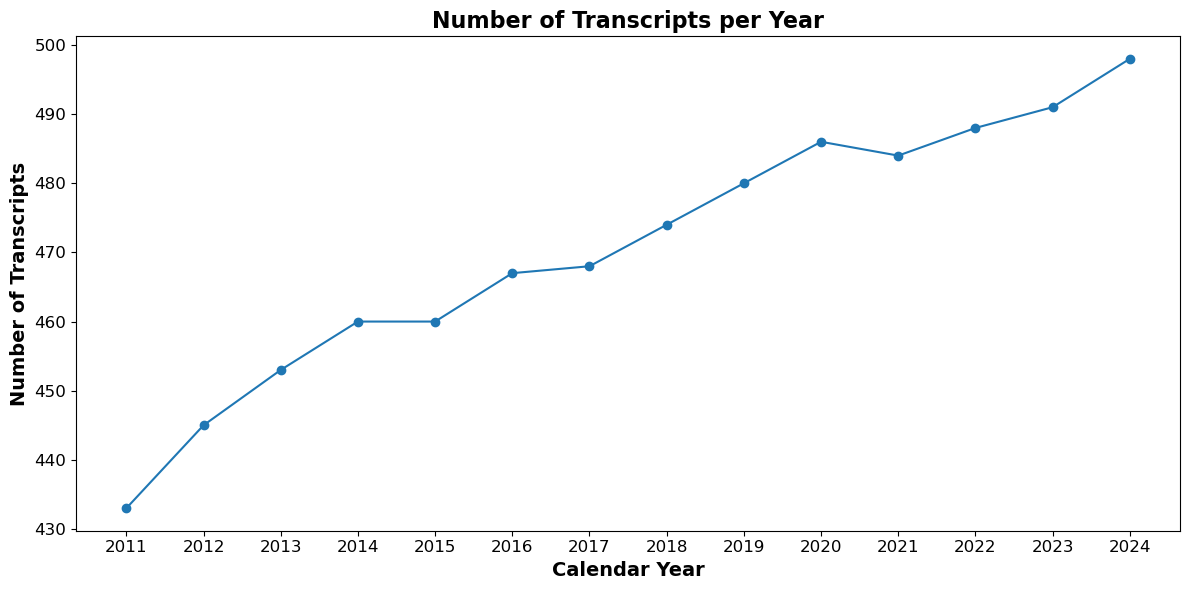

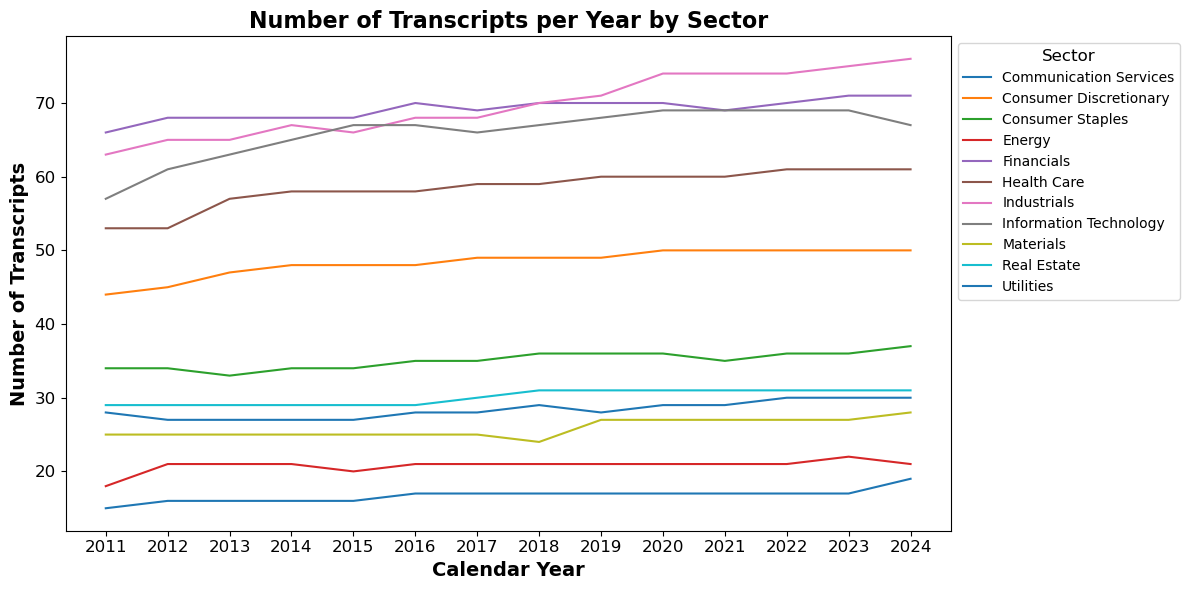

In [29]:
def plot_unique_tickers(df):
    # Filter to only quarters after 2011
    df = df[df['assigned_quarter'].str[:4].astype(int) >= 2011]

    # Extract year from assigned_quarter
    df['year'] = df['assigned_quarter'].str[:4]

    # First plot: unique tickers per year
    unique_tickers_per_year = df.groupby('year')['ticker'].nunique()

    plt.figure(figsize=(12, 6))
    plt.plot(unique_tickers_per_year.index, unique_tickers_per_year.values, marker='o', markersize=6)
    plt.title('Number of Transcripts per Year', fontweight='bold', fontsize=16)
    plt.xlabel('Calendar Year', fontweight='bold', fontsize=14)
    plt.ylabel('Number of Transcripts', fontweight='bold', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

    # Second plot: unique tickers per year separated by sector
    # Remove duplicates based on ticker, assigned_quarter, and sector
    df_unique = df.drop_duplicates(subset=['ticker', 'assigned_quarter', 'sector_name_mapped'])

    # Group by year and sector
    sector_year_counts = df_unique.groupby(['year', 'sector_name_mapped'])['ticker'].nunique().unstack(fill_value=0)

    plt.figure(figsize=(12, 6))
    for sector in sector_year_counts.columns:
        plt.plot(sector_year_counts.index, sector_year_counts[sector], label=sector)

    plt.title('Number of Transcripts per Year by Sector', fontweight='bold', fontsize=16)
    plt.xlabel('Calendar Year', fontweight='bold', fontsize=14)
    plt.ylabel('Number of Transcripts', fontweight='bold', fontsize=14)
    plt.legend(title='Sector', loc='upper left', bbox_to_anchor=(1, 1), fontsize=10, title_fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

plot_unique_tickers(df)

In [63]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_mentions_over_time(
    df,
    grouped_indices,
    index_to_topic_dict,
    assigned_quarter_col='assigned_quarter',
    specific_term=None,
    group=None,
    pres_qa="questions",
    topic_indices=None,
    custom_labels=None
):
    df = df.copy()
    df[assigned_quarter_col] = pd.PeriodIndex(df[assigned_quarter_col], freq='Q')
    df = df[df[assigned_quarter_col] >= '2011Q1']

    def format_quarters(x):
        return x.strftime('Q%q%Y')

    def set_q4_xticks(ax, xdata):
        xticks = [q for q in xdata.index if q.quarter == 4]
        ax.set_xticks(xticks)
        ax.set_xticklabels([format_quarters(q) for q in xticks], rotation=45, fontsize=11)

    # 🔥 Legend will be OUTSIDE the plot now
    legend_params = dict(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11)

    if topic_indices is not None:
        fig, ax = plt.subplots(figsize=(12, 6))
        for i, idx in enumerate(topic_indices):
            topic = index_to_topic_dict[idx]
            label = custom_labels[i] if custom_labels and i < len(custom_labels) else topic
            df[topic] = df[f"{pres_qa}_distinct_vector"].apply(lambda vec: vec[idx])
            trend = df.groupby(assigned_quarter_col)[topic].mean()
            trend.plot(ax=ax, label=label)

        set_q4_xticks(ax, trend)
        ax.set_title("Average Number of Questions in Selected Topics Over Time", fontweight='bold', fontsize=14)
        ax.set_xlabel("Calendar Quarter", fontweight='bold', fontsize=12)
        ax.set_ylabel("Average Mentions in Questions Per Transcript", fontweight='bold', fontsize=12)
        ax.legend(**legend_params)
        ax.tick_params(axis='y', labelsize=11)
        plt.tight_layout()
        plt.show()

    elif specific_term:
        index = next((i for i, topic in index_to_topic_dict.items() if topic == specific_term), None)
        if index is None:
            raise ValueError(f"Term '{specific_term}' not found in index_to_topic_dict")

        df['term_value'] = df[f"{pres_qa}_distinct_vector"].apply(lambda vec: vec[index])
        trend = df.groupby(assigned_quarter_col)['term_value'].mean()

        fig, ax = plt.subplots(figsize=(10, 5))
        trend.plot(ax=ax, label=specific_term)
        set_q4_xticks(ax, trend)
        ax.set_title(f"Distinct Mentions in {pres_qa.capitalize()} for '{specific_term}' Over Time", fontweight='bold', fontsize=14)
        ax.set_xlabel("Calendar Quarter", fontweight='bold', fontsize=12)
        ax.set_ylabel("Average Mentions in Questions Per Transcript", fontweight='bold', fontsize=12)
        ax.legend(**legend_params)
        ax.tick_params(axis='y', labelsize=11)
        plt.tight_layout()
        plt.show()

    elif group:
        indices = grouped_indices.get(group)
        if not indices:
            raise ValueError(f"Group '{group}' not found or is empty")

        fig, ax = plt.subplots(figsize=(12, 6))
        for i, idx in enumerate(indices):
            topic = index_to_topic_dict[idx]
            label = custom_labels[i] if custom_labels and i < len(custom_labels) else topic
            df[topic] = df[f"{pres_qa}_distinct_vector"].apply(lambda vec: vec[idx])
            trend = df.groupby(assigned_quarter_col)[topic].mean()
            trend.plot(ax=ax, label=label)

        set_q4_xticks(ax, trend)
        ax.set_title(f"Distinct Number of Questions of Topics in {group.capitalize()} Group Over Time", fontweight='bold', fontsize=14)
        ax.set_xlabel("Calendar Quarter", fontweight='bold', fontsize=12)
        ax.set_ylabel("Average Mentions in Questions Per Transcript", fontweight='bold', fontsize=12)
        ax.legend(**legend_params)
        ax.tick_params(axis='y', labelsize=11)
        plt.tight_layout()
        plt.show()

    else:
        fig, ax = plt.subplots(figsize=(12, 6))
        for i, (group_name, indices) in enumerate(grouped_indices.items()):
            label = custom_labels[i] if custom_labels and i < len(custom_labels) else group_name
            df[f'{group_name}_sum'] = df[f"{pres_qa}_distinct_vector"].apply(
                lambda vec: sum(vec[i] for i in indices)
            )
            trend = df.groupby(assigned_quarter_col)[f'{group_name}_sum'].mean()
            trend.plot(ax=ax, label=label)

        set_q4_xticks(ax, trend)
        ax.set_title("Number of Questions in Topic Groups Over Time", fontweight='bold', fontsize=14)
        ax.set_xlabel("Calendar Quarter", fontweight='bold', fontsize=12)
        ax.set_ylabel("Average Number of Questions Per Transcript", fontweight='bold', fontsize=12)
        ax.legend(**legend_params)
        ax.tick_params(axis='y', labelsize=11)
        plt.tight_layout()
        plt.show()


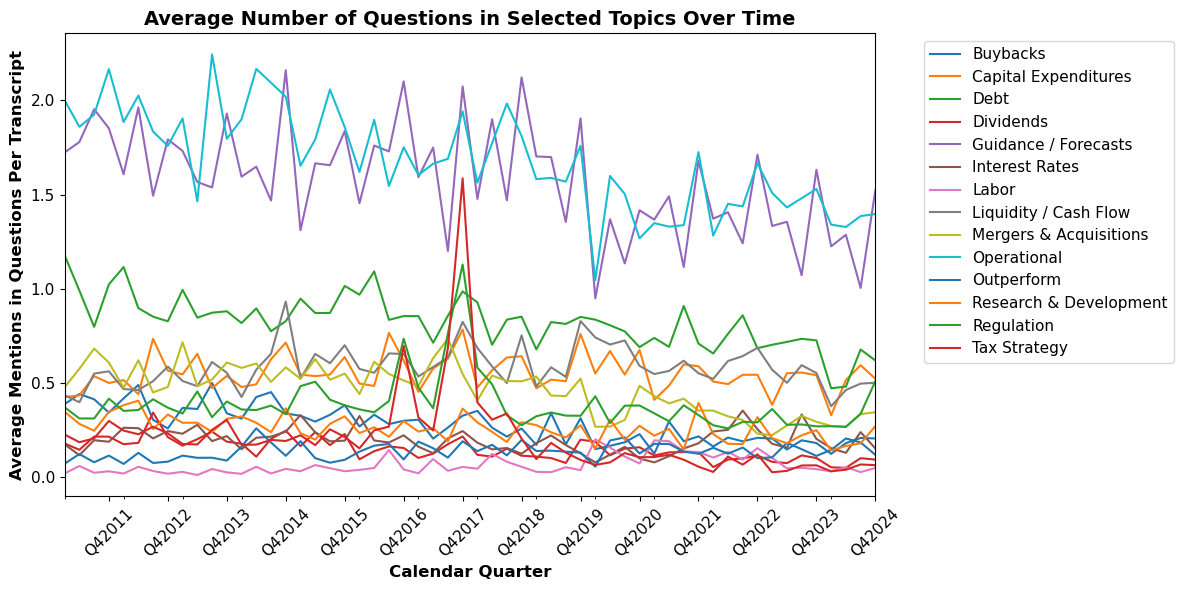

In [64]:
# plot_mentions_over_time(df, grouped_indices_frequency, index_to_topic_dict)
# plot_mentions_over_time(df, grouped_indices, index_to_topic_dict, specific_term="m_and_a")
custom_labels = ["Buybacks", "Capital Expenditures", "Debt", "Dividends", "Guidance / Forecasts", "Interest Rates", "Labor", "Liquidity / Cash Flow", "Mergers & Acquisitions", "Operational", "Outperform", "Research & Development", "Regulation", "Tax Strategy"]

# topic_indices = [0, 3, 4, 5, 11, 14, 17, 23, 28, 29]
topic_indices = [1, 2, 8, 9, 13, 15, 17, 18, 19, 20, 22, 25, 26, 30]

# topic_indices = [14, 23, 28, 29]
# topic_indices = [0, 4, 5, 11, 17]

# custom_labels = ['Artificial Intelligence', 'Climate', 'Commodity Prices', 'Consumer Demand', 'Geopolitical', 'Inflation', 'Labor', 'Pandemic', 'Supply Chain', 'Tariffs']
# custom_labels = ['Artificial Intelligence', 'Commodity Prices', 'Consumer Demand', 'Geopolitical', 'Labor']
# custom_labels = ['Inflation', 'Pandemic', 'Supply Chain', 'Tariffs']

plot_mentions_over_time(df, grouped_indices, index_to_topic_dict, topic_indices=topic_indices, custom_labels = custom_labels)




In [19]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_filtered_mentions_over_time(
    df,
    index_to_topic_dict,
    topic_list,
    assigned_quarter_col='assigned_quarter',
    ticker=None,
    sector=None,
    vector_column='questions_distinct_vector',
    title_suffix=None
):

    df = df.copy()
    df[assigned_quarter_col] = pd.PeriodIndex(df[assigned_quarter_col], freq='Q')
    df = df[df[assigned_quarter_col] >= '2011Q1']  # Filter from 2011 onward

    if ticker:
        df = df[df['ticker'] == ticker]
    if sector:
        df = df[df['sector_name_mapped'] == sector]

    # Map topic names to indices
    topic_name_to_index = {v: k for k, v in index_to_topic_dict.items()}
    selected_indices = [topic_name_to_index[name] for name in topic_list if name in topic_name_to_index]

    def format_quarters(x):
        return x.strftime('Q%q%Y')

    def set_q4_xticks(ax, xdata):
        xticks = [q for q in xdata.index if q.quarter == 4]
        ax.set_xticks(xticks)
        ax.set_xticklabels([format_quarters(q) for q in xticks], rotation=45)

    fig, ax = plt.subplots(figsize=(12, 6))

    for idx in selected_indices:
        topic_name = index_to_topic_dict[idx]
        df[topic_name] = df[vector_column].apply(lambda vec: vec[idx])
        trend = df.groupby(assigned_quarter_col)[topic_name].mean()
        trend.plot(ax=ax, label=topic_name)

    set_q4_xticks(ax, trend)
    
    filter_desc = ""
    if ticker: filter_desc += f" — {ticker}"
    if sector: filter_desc += f" — {sector}"
    if title_suffix: filter_desc += f" — {title_suffix}"

    ax.set_title(f"Distinct Mentions in Presentation Over Time{filter_desc}")
    ax.set_xlabel("Calendar Quarter")
    ax.set_ylabel("Avg Mentions")
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


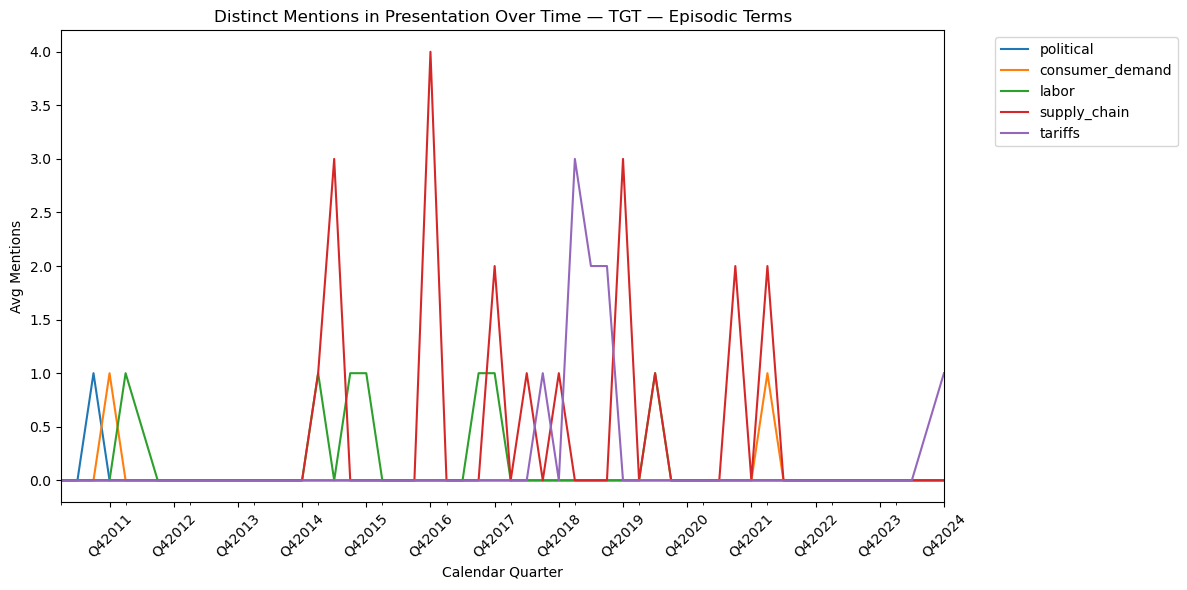

In [20]:
plot_filtered_mentions_over_time(
    df,
    index_to_topic_dict=index_to_topic_dict,
    topic_list= ['political', 'consumer_demand', 'labor', 'supply_chain', 'tariffs'],  # or a pre-defined list like episodic_topics
    ticker='TGT',
    title_suffix='Episodic Terms'
)




In [181]:
def plot_filtered_mentions_vs_sector_median(
    df,
    index_to_topic_dict,
    topic_list,
    assigned_quarter_col='assigned_quarter',
    ticker=None,
    sector=None,
    vector_column='questions_distinct_vector',
    use='median',  # or 'mean'
    title_suffix=None,
    custom_labels=None  # match Function 1
):
    assert ticker is not None, "You must specify a ticker"
    df = df.copy()
    df[assigned_quarter_col] = pd.PeriodIndex(df[assigned_quarter_col], freq='Q')
    df = df[df[assigned_quarter_col] >= '2023Q1']

    topic_name_to_index = {v: k for k, v in index_to_topic_dict.items()}
    selected_indices = [topic_name_to_index[name] for name in topic_list if name in topic_name_to_index]

    ticker_df = df[df['ticker'] == ticker]
    if sector is None:
        sector = df[df['ticker'] == ticker]['group_name_mapped'].iloc[0]
    sector_df = df[(df['group_name_mapped'] == sector) & (df['ticker'] != ticker)]

    fig, ax = plt.subplots(figsize=(12, 6))

    # Generate fixed colors for each topic
    color_map = cm.get_cmap('tab10', len(selected_indices))
    topic_colors = {index_to_topic_dict[idx]: mcolors.to_hex(color_map(i)) for i, idx in enumerate(selected_indices)}

    for i, idx in enumerate(selected_indices):
        topic_name = index_to_topic_dict[idx]
        color = topic_colors[topic_name]

        ticker_df[topic_name] = ticker_df[vector_column].apply(lambda vec: vec[idx])
        sector_df[topic_name] = sector_df[vector_column].apply(lambda vec: vec[idx])

        ticker_trend = ticker_df.groupby(assigned_quarter_col)[topic_name].mean()
        sector_trend = (
            sector_df.groupby(assigned_quarter_col)[topic_name].median()
            if use == 'median' else
            sector_df.groupby(assigned_quarter_col)[topic_name].mean()
        )

        label1 = f"{topic_name} — {ticker}"
        label2 = f"{topic_name} — group median"
        if custom_labels and i < len(custom_labels):
            label1 = f"{custom_labels[i]} — {ticker}"
            label2 = f"{custom_labels[i]} — group median"

        ticker_trend.plot(ax=ax, label=label1, color=color, linewidth=2)
        sector_trend.plot(ax=ax, linestyle='--', label=label2, color=color, alpha=0.7, linewidth=2)

    # Use Q1 ticks only (like Function 1)
    all_quarters = pd.period_range(df[assigned_quarter_col].min(), df[assigned_quarter_col].max(), freq='Q')
    q1_ticks = [q for q in all_quarters if q.quarter == 1]
    ax.set_xticks(q1_ticks)
    ax.set_xticklabels([f'Q1{q.year}' for q in q1_ticks], rotation=45)

    title = f"Distinct Question Mentions Over Time — {ticker} vs Median of {sector}"
    if title_suffix:
        title += f" — {title_suffix}"
    ax.set_title(title)
    ax.set_xlabel("Calendar Quarter")
    ax.set_ylabel("Number of Distinct Mentions in Questions")
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

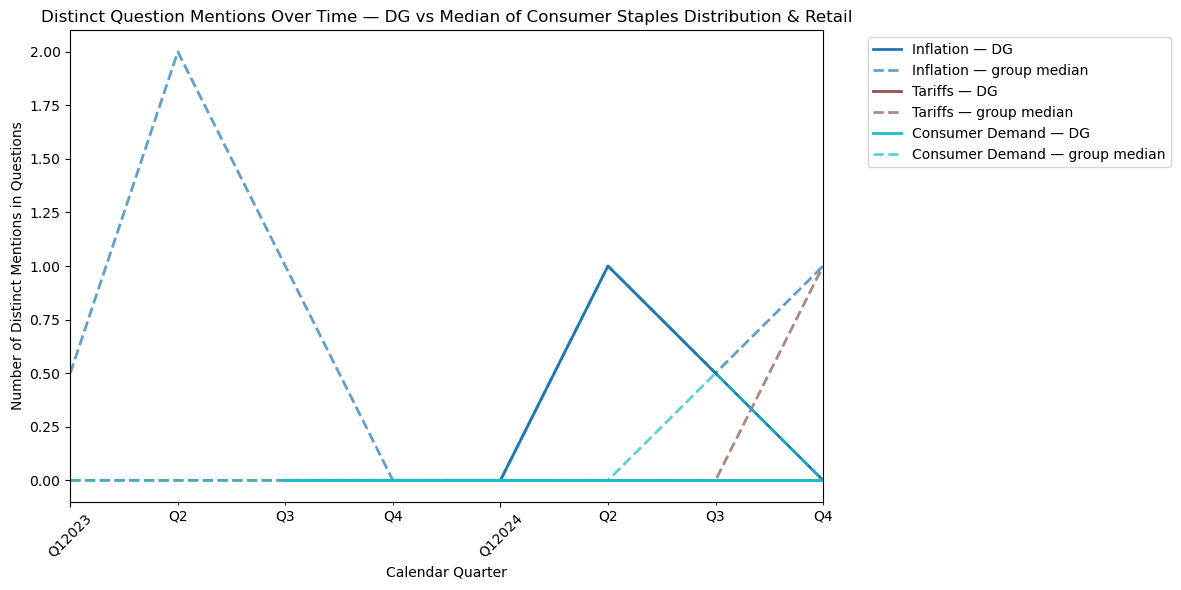

In [213]:
plot_filtered_mentions_vs_sector_median(
    df_new,
    index_to_topic_dict=index_to_topic_dict,
    topic_list=['inflation', 'tariffs', 'consumer_demand'],
    # 'supply_chain',
    ticker='DG',
    use='median',
    custom_labels=['Inflation',  'Tariffs', 'Consumer Demand']
)

In [8]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

def plot_q4_bar_comparison(
    df,
    index_to_topic_dict,
    topic_list,
    assigned_quarter_col='assigned_quarter',
    ticker1=None,
    ticker2=None,
    vector_column='questions_distinct_vector',
    quarter='2024Q4',
    group=None,
    sector=None,
    use='mean',
    custom_labels=None
):
    df = df.copy()
    df[assigned_quarter_col] = pd.PeriodIndex(df[assigned_quarter_col], freq='Q')
    df = df[df[assigned_quarter_col] == quarter]

    topic_name_to_index = {v: k for k, v in index_to_topic_dict.items()}
    selected_indices = [topic_name_to_index[name] for name in topic_list if name in topic_name_to_index]

    sources = []
    if ticker1:
        df1 = df[df['ticker'] == ticker1]
        sources.append(('Company 1', ticker1, df1))
    if ticker2:
        df2 = df[df['ticker'] == ticker2]
        sources.append(('Company 2', ticker2, df2))
    if group:
        group_df = df[(df['group_name_mapped'] == group) & (~df['ticker'].isin(filter(None, [ticker1, ticker2])))]
        sources.append((f"{group} Median", f"{group} Median", group_df))
    if sector:
        sector_df = df[(df['sector_name_mapped'] == sector) & (~df['ticker'].isin(filter(None, [ticker1, ticker2])))]
        sources.append((f"{sector} Median", f"{sector} Median", sector_df))

    bar_data = {label: [] for _, label, _ in sources}
    labels = []
    for i, idx in enumerate(selected_indices):
        topic_label = custom_labels[i] if custom_labels and i < len(custom_labels) else index_to_topic_dict[idx]
        labels.append(topic_label)

        for src_type, label, df_src in sources:
            if src_type in [f"{group} Median", f"{sector} Median"] and df_src.empty:
                val = 0
            else:
                series = df_src[vector_column].apply(lambda vec: vec[idx] if isinstance(vec, list) and len(vec) > idx else 0)
                val = series.median() if use == 'median' else series.mean()
            bar_data[label].append(val)

    x = range(len(labels))
    num_series = len(sources)
    width = 0.8 / max(1, num_series)
    offsets = [(-0.5 * (num_series - 1) + i) * width for i in range(num_series)]

    fig, ax = plt.subplots(figsize=(12, 6))
    for i, (_, label, _) in enumerate(sources):
        bar_vals = bar_data[label]
        ax.bar(
            [xi + offsets[i] for xi in x],
            bar_vals,
            width,
            label=label  # uses default color
        )

    ax.set_ylabel('Distinct Mentions in Questions', fontsize=12)
    ax.set_title(f'Number of Questions by Topic — {quarter}', fontsize=14, weight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=0, ha='right', fontsize=10)
    ax.legend(frameon=False, fontsize=10)
    ax.grid(True, axis='y', linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()


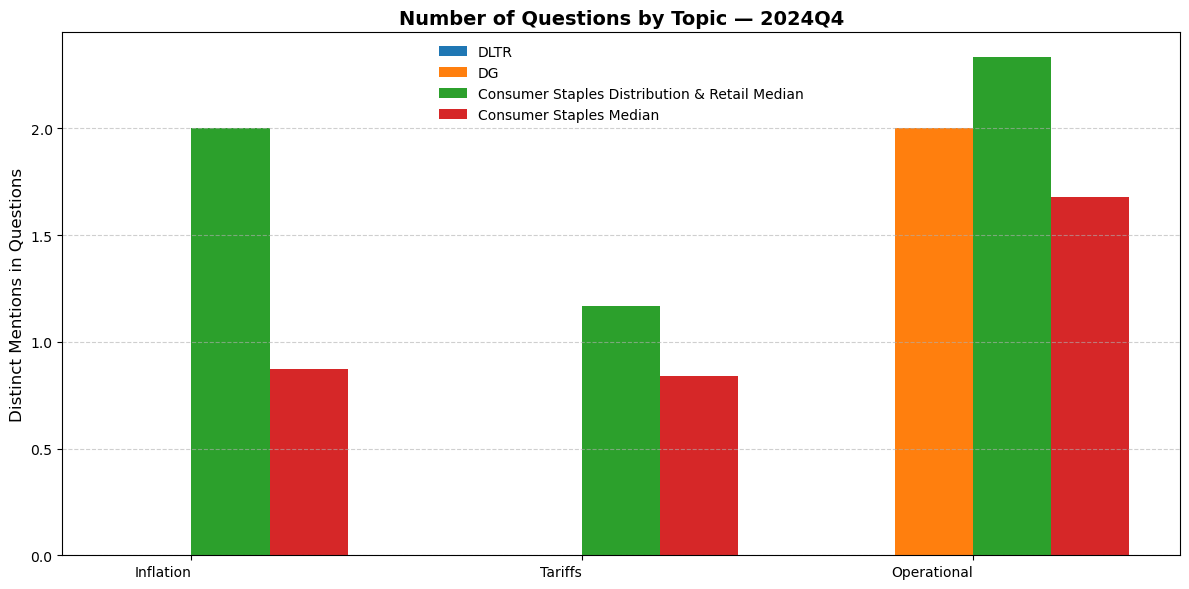

In [21]:
plot_q4_bar_comparison(
    df,
    index_to_topic_dict=index_to_topic_dict,
    topic_list=['inflation', 'tariffs', 'operational'],
    ticker1='DLTR',
    ticker2='DG',
    group='Consumer Staples Distribution & Retail',
    sector='Consumer Staples',
    custom_labels=['Inflation', 'Tariffs', 'Operational']
)

In [85]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_tariff_mention_summary_fixed(df, index_to_topic_dict, assigned_quarter_col='assigned_quarter', vector_column='questions_distinct_vector'):
    df = df.copy()
    df[assigned_quarter_col] = pd.PeriodIndex(df[assigned_quarter_col], freq='Q')

    # Find the index corresponding to "tariffs"
    tariffs_idx = next((i for i, topic in index_to_topic_dict.items() if topic == 'tariffs'), None)
    if tariffs_idx is None:
        raise ValueError("'tariffs' not found in index_to_topic_dict")

    df['tariffs_mentions'] = df[vector_column].apply(lambda vec: vec[tariffs_idx] if isinstance(vec, list) and len(vec) > tariffs_idx else 0)

    df_2018 = df[(df[assigned_quarter_col] >= '2018Q1') & (df[assigned_quarter_col] <= '2018Q4')]
    df_2024q4 = df[df[assigned_quarter_col] == '2024Q4']

    tickers = df['ticker'].unique()

    mention_2018 = set()
    mention_2024q4 = set()

    for ticker in tickers:
        ticker_2018 = df_2018[df_2018['ticker'] == ticker]
        ticker_2024q4 = df_2024q4[df_2024q4['ticker'] == ticker]

        if (ticker_2018['tariffs_mentions'] > 0).any():
            mention_2018.add(ticker)
        if (ticker_2024q4['tariffs_mentions'] > 0).any():
            mention_2024q4.add(ticker)

    # Disjoint groups
    only_2018 = mention_2018 - mention_2024q4
    only_2024q4 = mention_2024q4 - mention_2018
    both = mention_2018 & mention_2024q4
    neither = set(tickers) - (mention_2018 | mention_2024q4)

    # Bar plot
    categories = ['Only 2018 (Any Quarter)', 'Only 2024Q4', 'Both', 'Neither']
    counts = [len(only_2018), len(only_2024q4), len(both), len(neither)]

    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Just use default matplotlib colors
    # ax.bar(categories, counts)
    ax.bar(categories, counts, color=['C0', 'C1', 'C2', 'C3']) 
    
    ax.set_ylabel('Number of Companies')
    ax.set_title('Number of Companies with Questions Related to Tariffs in 2018 and 2024Q4')
    for i, v in enumerate(counts):
        ax.text(i, v + 2, str(v), ha='center')
    plt.tight_layout()
    plt.show()


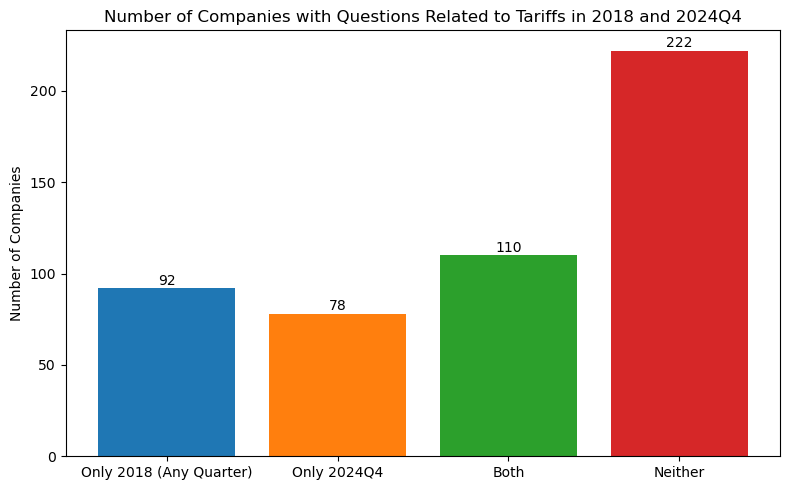

In [86]:
plot_tariff_mention_summary_fixed(
    df=df,
    index_to_topic_dict=index_to_topic_dict,
    assigned_quarter_col='assigned_quarter',
    vector_column='questions_distinct_vector'
)

In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_group_tariff_mentions(
    df,
    index_to_topic_dict,
    assigned_quarter_col='assigned_quarter',
    vector_column='questions_distinct_vector',
    threshold_frac=0.25
):
    df = df.copy()
    df[assigned_quarter_col] = pd.PeriodIndex(df[assigned_quarter_col], freq='Q')

    # Find tariff index
    tariffs_idx = next((i for i, topic in index_to_topic_dict.items() if topic == 'tariffs'), None)
    if tariffs_idx is None:
        raise ValueError("'tariffs' not found in index_to_topic_dict")

    df['tariffs_mentions'] = df[vector_column].apply(
        lambda vec: vec[tariffs_idx] if isinstance(vec, list) and len(vec) > tariffs_idx else 0
    )

    df_2011_2016 = df[(df[assigned_quarter_col] >= '2011Q1') & (df[assigned_quarter_col] <= '2016Q4')]
    df_2018 = df[(df[assigned_quarter_col] >= '2018Q1') & (df[assigned_quarter_col] <= '2018Q4')]
    df_2024q4 = df[df[assigned_quarter_col] == '2024Q4']

    groups = df['group_name_mapped'].dropna().unique()

    results_v1 = {'Only 2018': 0, 'Only 2024Q4': 0, 'Both': 0, 'Neither': 0}
    results_v2 = {'Only 2018': 0, 'Only 2024Q4': 0, 'Both': 0, 'Neither': 0}

    groups_v1 = {'Only 2018': [], 'Only 2024Q4': [], 'Both': [], 'Neither': []}
    groups_v2 = {'Only 2018': [], 'Only 2024Q4': [], 'Both': [], 'Neither': []}

    for group in groups:
        group_2011_2016 = df_2011_2016[df_2011_2016['group_name_mapped'] == group]
        group_2018 = df_2018[df_2018['group_name_mapped'] == group]
        group_2024q4 = df_2024q4[df_2024q4['group_name_mapped'] == group]

        companies_2018 = group_2018['ticker'].unique()
        companies_2024q4 = group_2024q4['ticker'].unique()

        if len(group_2011_2016) > 0:
            group_mention_rate_by_quarter = group_2011_2016.groupby(assigned_quarter_col).apply(
                lambda g: (g['tariffs_mentions'] > 0).sum() / g['ticker'].nunique()
            )
            avg_rate = group_mention_rate_by_quarter.mean()
            std_rate = group_mention_rate_by_quarter.std()
            threshold_v1 = avg_rate + 2 * std_rate
        else:
            threshold_v1 = 1.0

        rate_2018 = (group_2018[group_2018['tariffs_mentions'] > 0]['ticker'].nunique()) / max(1, len(companies_2018))
        rate_2024q4 = (group_2024q4[group_2024q4['tariffs_mentions'] > 0]['ticker'].nunique()) / max(1, len(companies_2024q4))

        # Version 1 logic
        v1_2018 = rate_2018 > threshold_v1
        v1_2024q4 = rate_2024q4 > threshold_v1

        if v1_2018 and v1_2024q4:
            results_v1['Both'] += 1
            groups_v1['Both'].append(group)
        elif v1_2018:
            results_v1['Only 2018'] += 1
            groups_v1['Only 2018'].append(group)
        elif v1_2024q4:
            results_v1['Only 2024Q4'] += 1
            groups_v1['Only 2024Q4'].append(group)
        else:
            results_v1['Neither'] += 1
            groups_v1['Neither'].append(group)

        # Version 2 logic
        v2_2018 = rate_2018 > threshold_frac
        v2_2024q4 = rate_2024q4 > threshold_frac

        if v2_2018 and v2_2024q4:
            results_v2['Both'] += 1
            groups_v2['Both'].append(group)
        elif v2_2018:
            results_v2['Only 2018'] += 1
            groups_v2['Only 2018'].append(group)
        elif v2_2024q4:
            results_v2['Only 2024Q4'] += 1
            groups_v2['Only 2024Q4'].append(group)
        else:
            results_v2['Neither'] += 1
            groups_v2['Neither'].append(group)

    # Plotting
    colors = ['C0', 'C1', 'C2', 'C3']

    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # Plot 1
    axs[0].bar(results_v1.keys(), results_v1.values(), color=colors)
    axs[0].set_title('Groups Exceeding Baseline (Avg + 2 Std)', fontsize=14)
    axs[0].set_ylabel('Number of Groups')
    axs[0].set_xlabel('Category')
    for i, v in enumerate(results_v1.values()):
        axs[0].text(i, v + 0.5, str(v), ha='center', fontsize=10)

    # Plot 2
    axs[1].bar(results_v2.keys(), results_v2.values(), color=colors)
    axs[1].set_title(f'Groups with > {threshold_frac*100:.0f}% Companies Mentioning Tariffs', fontsize=14)
    axs[1].set_ylabel('Number of Groups')
    axs[1].set_xlabel('Category')
    for i, v in enumerate(results_v2.values()):
        axs[1].text(i, v + 0.5, str(v), ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()

    # Print lists
    print("\n--- Version 1 (vs 2011-2016 Avg + 2*Std) ---")
    for key, groups_list in groups_v1.items():
        print(f"{key}: {groups_list}")

    print("\n--- Version 2 (Threshold > {:.0f}%) ---".format(threshold_frac * 100))
    for key, groups_list in groups_v2.items():
        print(f"{key}: {groups_list}")


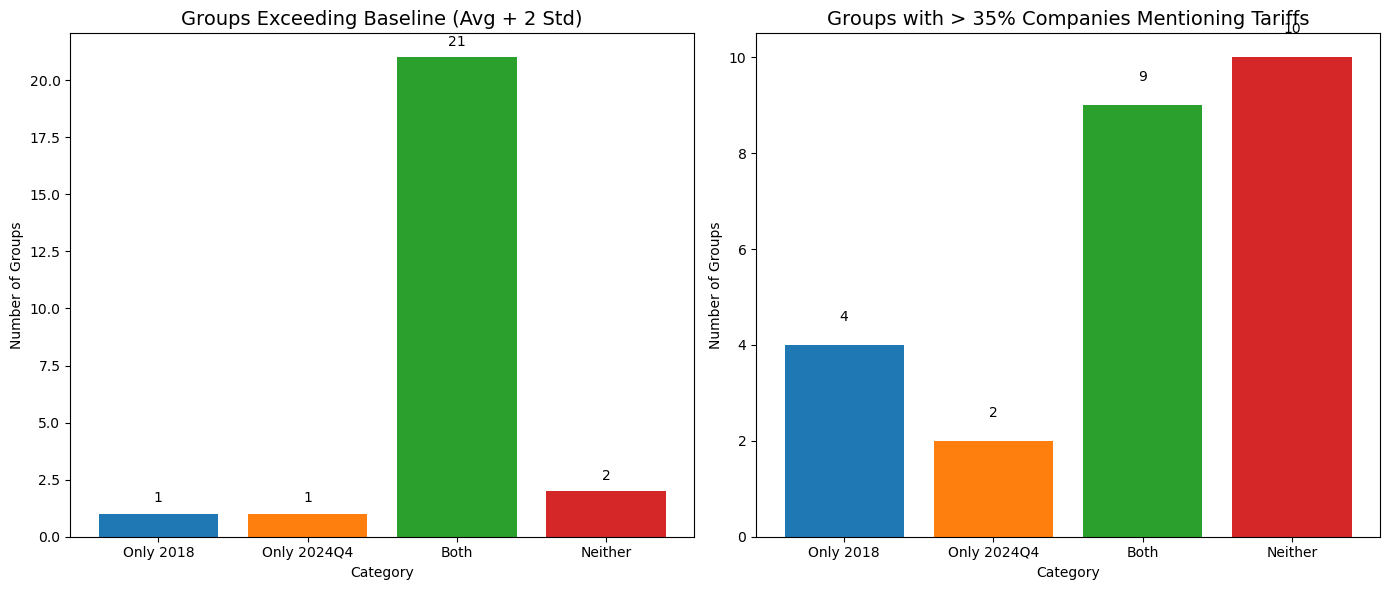


--- Version 1 (vs 2011-2016 Avg + 2*Std) ---
Only 2018: ['Real Estate Management & Development']
Only 2024Q4: ['Food, Beverage & Tobacco']
Both: ['Consumer Discretionary Distribution & Retail', 'Consumer Durables & Apparel', 'Commercial & Professional Services', 'Consumer Staples Distribution & Retail', 'Technology Hardware & Equipment', 'Insurance', 'Financial Services', 'Capital Goods', 'Software & Services', 'Health Care Equipment & Services', 'Materials', 'Semiconductors & Semiconductor Equipment', 'Energy', 'Utilities', 'Equity Real Estate Investment Trusts (REITs)', 'Pharmaceuticals, Biotechnology & Life Sciences', 'Consumer Services', 'Automobiles & Components', 'Transportation', 'Banks', 'Household & Personal Products']
Neither: ['Media & Entertainment', 'Telecommunication Services']

--- Version 2 (Threshold > 35%) ---
Only 2018: ['Software & Services', 'Real Estate Management & Development', 'Banks', 'Household & Personal Products']
Only 2024Q4: ['Food, Beverage & Tobacco', 

In [77]:
plot_group_tariff_mentions(
    df,
    index_to_topic_dict,
    assigned_quarter_col='assigned_quarter',
    vector_column='questions_distinct_vector',
    threshold_frac=0.35
)

In [260]:
df_new[df_new['group_name_mapped'] == 'Consumer Staples Distribution & Retail']['ticker'].unique()

array(['COST', 'DG', 'DLTR', 'SYY', 'WMT', 'WBA', 'TGT', 'KR'],
      dtype=object)

In [217]:
df_new[df_new['ticker'] == 'DG']['questions_distinct_vector'][31584]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 2.0,
 4.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [214]:
df_new[df_new['ticker'] == 'DG']['assigned_quarter'].unique()

array(['2011Q2', '2011Q3', '2011Q4', '2012Q1', '2012Q2', '2012Q3',
       '2012Q4', '2013Q1', '2013Q2', '2013Q3', '2013Q4', '2014Q1',
       '2014Q2', '2014Q3', '2014Q4', '2015Q1', '2015Q2', '2015Q3',
       '2015Q4', '2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1',
       '2017Q2', '2017Q3', '2017Q4', '2018Q1', '2018Q2', '2018Q3',
       '2018Q4', '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1',
       '2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2', '2021Q3',
       '2021Q4', '2024Q1', '2024Q2', '2023Q3', '2022Q1', '2022Q2',
       '2022Q3', '2022Q4', '2024Q4'], dtype=object)

In [5]:
def plot_mentions_two_tickers(
    df,
    index_to_topic_dict,
    topic_list,
    ticker1,
    ticker2,
    assigned_quarter_col='assigned_quarter',
    vector_column='questions_distinct_vector',
    title_suffix=None
):
    df = df.copy()
    df[assigned_quarter_col] = pd.PeriodIndex(df[assigned_quarter_col], freq='Q')
    df = df[df[assigned_quarter_col] >= '2017Q1']

    topic_name_to_index = {v: k for k, v in index_to_topic_dict.items()}
    selected_indices = [topic_name_to_index[name] for name in topic_list if name in topic_name_to_index]

    df1 = df[df['ticker'] == ticker1]
    df2 = df[df['ticker'] == ticker2]

    def format_quarters(x):
        return x.strftime('Q%q%Y')

    def set_q4_xticks(ax, xdata):
        xticks = [q for q in xdata.index if q.quarter == 4]
        ax.set_xticks(xticks)
        ax.set_xticklabels([format_quarters(q) for q in xticks], rotation=45)

    fig, ax = plt.subplots(figsize=(12, 6))

    # Fixed colors per topic
    color_map = cm.get_cmap('tab10', len(selected_indices))
    topic_colors = {index_to_topic_dict[idx]: mcolors.to_hex(color_map(i)) for i, idx in enumerate(selected_indices)}

    for idx in selected_indices:
        topic_name = index_to_topic_dict[idx]
        color = topic_colors[topic_name]

        df1[topic_name] = df1[vector_column].apply(lambda vec: vec[idx])
        df2[topic_name] = df2[vector_column].apply(lambda vec: vec[idx])
    
        trend1 = df1.groupby(assigned_quarter_col)[topic_name].mean()
        trend2 = df2.groupby(assigned_quarter_col)[topic_name].mean()
        trend1.plot(ax=ax, label=f"{topic_name} — {ticker1}", color=color, linewidth=2)
        trend2.plot(ax=ax, label=f"{topic_name} — {ticker2}", color=color, linestyle='--', alpha=0.6, linewidth=2)


        # trend1.plot(ax=ax, label=f"{topic_name} — {ticker1}", color=color, linewidth=2)
        # trend2.plot(ax=ax, label=f"{topic_name} — {ticker2}", color=color, linestyle='dotted', alpha=0.7)

    set_q4_xticks(ax, trend1)

    title = f"Mentions Over Time — {ticker1} vs {ticker2}"
    if title_suffix:
        title += f" — {title_suffix}"
    ax.set_title(title)
    ax.set_xlabel("Calendar Quarter")
    ax.set_ylabel("Avg Mentions")
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


NameError: name 'cm' is not defined

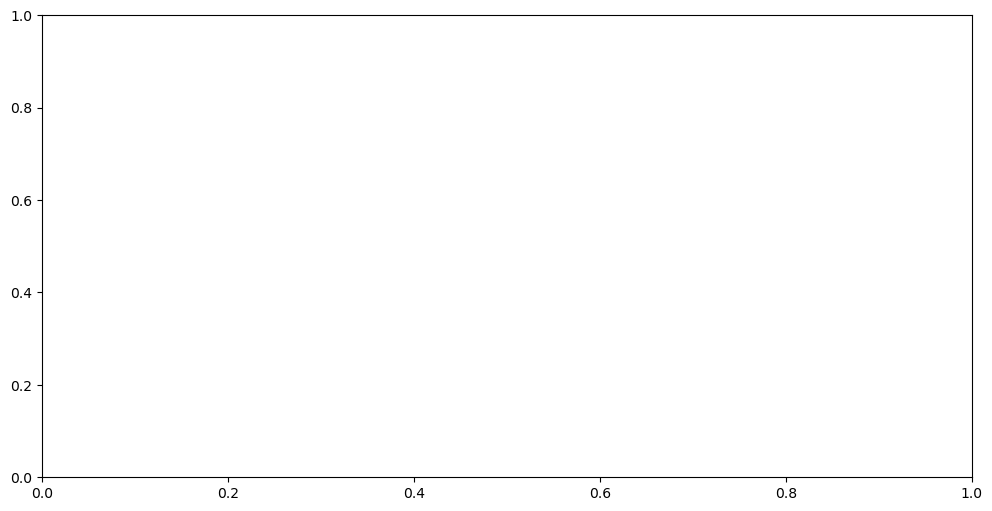

In [7]:
plot_mentions_two_tickers(
    df,
    index_to_topic_dict,
    topic_list=['inflation', 'supply_chain', 'tariffs', 'consumer_demand'],
    ticker1 = 'PG',
    ticker2 = 'CL',
    assigned_quarter_col='assigned_quarter',
    vector_column='questions_distinct_vector',
    title_suffix=None
)



In [158]:
print(df2[df2['ticker'] == 'DLTR']['assigned_quarter'].unique())


['2011Q2' '2011Q3' '2011Q4' '2012Q1' '2012Q2' '2012Q3' '2012Q4' '2013Q1'
 '2013Q2' '2013Q3' '2013Q4' '2014Q1' '2014Q2' '2014Q3' '2014Q4' '2015Q1'
 '2015Q2' '2015Q3' '2015Q4' '2016Q1' '2016Q2' '2016Q3' '2016Q4' '2017Q1'
 '2017Q2' '2017Q3' '2017Q4' '2018Q1' '2018Q2' '2018Q3' '2018Q4' '2019Q1'
 '2019Q2' '2019Q3' '2019Q4' '2020Q1' '2020Q2' '2020Q3' '2020Q4' '2022Q1'
 '2022Q2' '2022Q3' '2022Q4' '2024Q1' '2024Q2' '2023Q1' '2023Q2' '2023Q3'
 '2023Q4' '2024Q4']


In [64]:
base_cols = [
    'ticker', 'year', 'assigned_quarter', 'quarter',
    'sector_name_mapped', 'ind_name_mapped',
    'group_name_mapped', 'subind_name_mapped'
]

# Add all columns that contain 'vector' in the name
vector_cols = [col for col in df.columns if 'vector' in col]

# Combine and filter
cols_to_keep = base_cols + vector_cols
df_filtered = df[cols_to_keep].copy()

In [65]:
path = "/scratch/network/mm4846/transcripts_2006_2025_03_31_distinct_qa_vectors.csv"

df_filtered.to_csv(path)

In [27]:
# recurring_terms = [
#     "buyback", "dividend", "capex", "debt",
#     "guidance_forecasts", "liquidity_cash_flow",
#     "operational", "regulation", "tax_strategy"
# ]

# episodic_terms = [
#     "interest_rates", "inflation", "tariffs", "geopolitical_2",
#     "consumer_demand", "ai", "supply_chain", "labor",
#     "pandemic", "climate", "commodity_price"
# ]

# less_frequent_terms = [
#     "esg_sustainability", "currency_fluctuations_hedging", "rd",
#     "cybersecurity_data_protection", "reshoring",
#     "outperform"
# ]

less_frequent_terms= ['cybersecurity_data_protection', 'esg_sustainability', 'reshoring']
episodic_terms = ['ai', 'climate', 'commodity_price', 'consumer_demand', 'currency_fluctuations_hedging', 'geopolitical_2', 'inflation', 'pandemic', 'political', 'supply_chain', 'tariffs']
recurring_terms = ['buyback', 'capex', 'debt', 'dividend', 'guidance_forecasts', 'interest_rates', 'labor', 'liquidity_cash_flow', 'm_and_a', 'operational', 'outperform', 'rd', 'regulation', 'tax_strategy']
other_qs = [
    "other"]

macroeconomic_terms = [
    "interest_rates", "inflation", "tariffs", "currency_fluctuations_hedging",   "labor", "commodity_price",
    "consumer_demand", 
]

corporate_finance_terms = [
    "buyback", "dividend", "capex", "debt",  "liquidity_cash_flow",  "operational", "tax_strategy"]

policy_terms = ["political", "regulation"]

global_trends_terms = ["pandemic", "climate", "geopolitical"]

business_trends_terms = [
"rd", "outperform", "esg_sustainability","guidance_forecasts",  "ai", "climate",  "rd","m_and_a", "reshoring", "supply_chain", "cybersecurity_data_protection" , 
]


grouped_indices = {}

# Invert the index_to_topic_dict for lookup
topic_to_index = {v: k for k, v in index_to_topic_dict.items()}

# Helper function to map known terms to indices
def map_terms_to_indices(term_list):
    return [topic_to_index[term] for term in term_list if term in topic_to_index]

# Add new groupings

grouped_indices['recurring'] = map_terms_to_indices(recurring_terms)
grouped_indices['episodic'] = map_terms_to_indices(episodic_terms)
grouped_indices['less_frequent'] = map_terms_to_indices(less_frequent_terms)
grouped_indices['other'] = map_terms_to_indices(other_qs)

grouped_indices['macroeconomic'] = map_terms_to_indices(macroeconomic_terms)
grouped_indices['corporate_finance'] = map_terms_to_indices(corporate_finance_terms)
grouped_indices['policy'] = map_terms_to_indices(policy_terms)

grouped_indices['global_trends'] = map_terms_to_indices(global_trends_terms)
grouped_indices['business_trends'] = map_terms_to_indices(business_trends_terms)

grouped_indices_frequency = {}

grouped_indices_frequency['Recurring'] = map_terms_to_indices(recurring_terms)
grouped_indices_frequency['Episodic'] = map_terms_to_indices(episodic_terms)
grouped_indices_frequency['Less Frequent'] = map_terms_to_indices(less_frequent_terms)
grouped_indices_frequency['Other'] = map_terms_to_indices(other_qs)



In [16]:
grouped_indices_frequency

{'recurring': [1, 2, 8, 9, 13, 15, 17, 18, 19, 20, 22, 25, 26, 30],
 'episodic': [0, 3, 4, 5, 6, 11, 14, 23, 24, 28, 29],
 'less_frequent': [7, 10, 27],
 'other': [21]}

In [26]:
index_to_topic_dict = {
    0: 'ai',
    1: 'buyback',
    2: 'capex',
    3: 'climate',
    4: 'commodity_price',
    5: 'consumer_demand',
    6: 'currency_fluctuations_hedging',
    7: 'cybersecurity_data_protection',
    8: 'debt',
    9: 'dividend',
    10: 'esg_sustainability',
    11: 'geopolitical_2',
    12: 'geopolitical',
    13: 'guidance_forecasts',
    14: 'inflation',
    15: 'interest_rates',
    16: 'labor_cost',
    17: 'labor',
    18: 'liquidity_cash_flow',
    19: 'm_and_a',
    20: 'operational',
    21: 'other',
    22: 'outperform',
    23: 'pandemic',
    24: 'political',
    25: 'rd',
    26: 'regulation',
    27: 'reshoring',
    28: 'supply_chain',
    29: 'tariffs',
    30: 'tax_strategy'
}


topic_indices = [0, 3, 4, 5, 11, 14, 17, 23, 28, 29]
topic_indices = [23, 28, 29]

custom_labels = ['Artificial Intelligence', 'Climate', 'Commodity Prices', 'Consumer Demand', 'Geopolitical', 'Inflation', 'Labor', 'Pandemic', 'Supply Chain', 'Tariffs']


grouped_indices_theme = {
     "Macroeconomic": [
        4, 5, 6, 13, 14, 15, 29  # commodity_price, consumer_demand, currency_fluctuations_hedging, inflation, interest_rates, labor, tariffs
    ],
   "Corporate Finance":  [
        1, 2, 8, 9, 16, 18, 30  # buyback, capex, debt, dividend, labor_cost, liquidity_cash_flow, tax_strategy
    ],
    "Policy": [
        24, 26  # political, regulation
    ],
    "Global Trends": [
        3, 11, 23  # climate, geopolitical_2, pandemic
    ],
     "Business Trends":[
        0, 10, 12, 19, 22, 25, 27, 7, 17  # ai, esg_sustainability, geopolitical, m_and_a, outperform, rd, reshoring, cybersecurity_data_protection, labor
    ],
    "other": [
        21  # other
    ]
}

# 'recurring': [1, 9, 2, 8, 12, 16, 18, 23, 27],
#  'episodic': [14, 13, 26, 11, 5, 0, 25, 15, 20, 3, 4],
#  'less_frequent': [10, 6, 22, 15, 7, 24, 19]
# }


In [34]:
macroeconomic_mapping = {
    i + 1: index_to_topic_dict[idx] for i, idx in enumerate(grouped_indices['macroeconomic'])
}

corporate_finance_mapping = {
    i + 1: index_to_topic_dict[idx] for i, idx in enumerate(grouped_indices['corporate_finance'])
}

policy_mapping = {
    i + 1: index_to_topic_dict[idx] for i, idx in enumerate(grouped_indices['policy'])
}

global_trends_mapping = {
    i + 1: index_to_topic_dict[idx] for i, idx in enumerate(grouped_indices['global_trends'])
}

business_trends_mapping = {
    i + 1: index_to_topic_dict[idx] for i, idx in enumerate(grouped_indices['business_trends'])
}


business_trends_mapping


{1: 'ai',
 2: 'esg_sustainability',
 3: 'guidance_forecasts',
 4: 'outperform',
 5: 'rd',
 6: 'reshoring',
 7: 'supply_chain',
 8: 'cybersecurity_data_protection',
 9: 'm_and_a'}

In [72]:
topic_to_index = {v: k for k, v in index_to_topic_dict.items()}

# Function to build mapping
def build_mapping(term_list):
    return {i + 1: term for i, term in enumerate(term_list) if term in topic_to_index}

# Final mappings
recurring_mapping = build_mapping(recurring_terms)
episodic_mapping = build_mapping(episodic_terms)
less_frequent_mapping = build_mapping(less_frequent_terms)

In [73]:
recurring_mapping

{1: 'buyback',
 2: 'dividend',
 3: 'capex',
 4: 'debt',
 5: 'guidance_forecasts',
 6: 'liquidity_cash_flow',
 7: 'operational',
 8: 'regulation',
 9: 'tax_strategy'}

In [26]:
macroeconomic_mapping = {1: 'commodity_price', 2: 'consumer_demand', 3: 'currency_fluctuations_hedging', 
                         4: 'inflation', 5: 'interest_rates', 6: 'labor', 7: 'tariffs'}

corporate_finance_mapping = {1: 'buyback', 2: 'capex', 3: 'debt', 4: 'dividend', 5: 'liquidity_cash_flow',
                             6: 'operational', 7: 'tax_strategy'}

policy_mapping = {1: 'political', 2: 'regulation'}

global_trends_mapping = {1: 'climate', 2: 'geopolitical_2', 3: 'pandemic'}

business_trends_mapping = {1: 'ai', 2: 'esg_sustainability', 3: 'guidance_forecasts', 4: 'outperform', 
                           5: 'rd', 6: 'reshoring', 7: 'supply_chain', 8: 'cybersecurity_data_protection', 9: 'm_and_a'}

recurring_mapping = {1: 'buyback',
 2: 'dividend',
 3: 'capex',
 4: 'debt',
 5: 'guidance_forecasts',
 6: 'liquidity_cash_flow',
 7: 'operational',
 8: 'regulation',
 9: 'tax_strategy'}

episodic_mapping = {1: 'interest_rates',
 2: 'inflation',
 3: 'tariffs',
 4: 'geopolitical_2',
 5: 'consumer_demand',
 6: 'ai',
 7: 'supply_chain',
 8: 'labor',
 9: 'pandemic',
 10: 'climate',
 11: 'commodity_price'}

less_frequent_mapping = {1: 'esg_sustainability',
 2: 'currency_fluctuations_hedging',
 3: 'rd',
 4: 'cybersecurity_data_protection',
 5: 'reshoring',
 6: 'outperform'}

other_mapping = {1: 'other'}

In [31]:
# df_dltr.columns[6:]
df.columns[9:]

Index(['questions_distinct_vector', 'macroeconomic_questions_vector',
       'corporate_finance_questions_vector', 'policy_questions_vector',
       'global_trends_questions_vector', 'business_trends_questions_vector',
       'recurring_questions_vector', 'episodic_questions_vector',
       'other_questions_vector', 'less_frequent_questions_vector'],
      dtype='object')

In [32]:
# df_vectorized['questions_vector'][31275]
import ast
import numpy as np
def safe_parse_vector(val):
    if isinstance(val, str) and val.strip().startswith("["):
        try:
            return ast.literal_eval(val)
        except (ValueError, SyntaxError):
            return np.nan  # or [] if you prefer empty lists
    return np.nan  # or [] for consistency

# Apply safely

column_names = df.columns[9:]
column_names
for name in column_names: 
    df[name] = df[name].apply(safe_parse_vector)

In [30]:
topic_names = [index_to_topic_dict[i] for i in range(31)]
topic_df = pd.DataFrame(df['questions_distinct_vector'].tolist(), columns=topic_names)
topic_df['assigned_quarter'] = df['assigned_quarter']

# Convert to binary: 1 if mentioned, 0 if not
binary_topic_df = topic_df.copy()
binary_topic_df[topic_names] = binary_topic_df[topic_names].applymap(lambda x: 1 if x > 0 else 0)

# Group by quarter and count how many companies mention each topic (non-zero count)
quarterly_topic_counts = binary_topic_df.groupby('assigned_quarter')[topic_names].sum().sort_index()

# Compute mean and max number of companies mentioning each topic per quarter
topic_stats = pd.DataFrame({
    'mean': quarterly_topic_counts.mean(),
    'max': quarterly_topic_counts.max()
})

# Apply thresholds to define less frequent topics
mean_threshold = 30
max_threshold = 60

less_frequent_topics = topic_stats[
    (topic_stats['mean'] < mean_threshold) & 
    (topic_stats['max'] < max_threshold)
].index.tolist()

print("Less frequent topics:", less_frequent_topics)

# Drop less frequent topics
filtered_counts = quarterly_topic_counts.drop(columns=less_frequent_topics)

# Compute mean, std, and coefficient of variation (CV)
topic_stats_filtered = pd.DataFrame({
    'mean': filtered_counts.mean(),
    'std': filtered_counts.std()
})
topic_stats_filtered['cv'] = topic_stats_filtered['std'] / topic_stats_filtered['mean']

# Classify into episodic vs recurring based on CV
cv_threshold = 0.35
episodic_topics = topic_stats_filtered[topic_stats_filtered['cv'] > cv_threshold].index.tolist()
recurring_topics = topic_stats_filtered[topic_stats_filtered['cv'] <= cv_threshold].index.tolist()

print("Episodic topics:", episodic_topics)
print("Recurring topics:", recurring_topics)


/tmp/ipykernel_4003621/4017565927.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary_topic_df[topic_names] = binary_topic_df[topic_names].applymap(lambda x: 1 if x > 0 else 0)


Less frequent topics: ['climate', 'currency_fluctuations_hedging', 'cybersecurity_data_protection', 'esg_sustainability', 'geopolitical_2', 'reshoring']
Episodic topics: ['ai', 'buyback', 'commodity_price', 'consumer_demand', 'dividend', 'inflation', 'interest_rates', 'labor_cost', 'labor', 'outperform', 'pandemic', 'political', 'regulation', 'supply_chain', 'tariffs', 'tax_strategy']
Recurring topics: ['capex', 'debt', 'geopolitical', 'guidance_forecasts', 'liquidity_cash_flow', 'm_and_a', 'operational', 'other', 'rd']
